# Interact with  `D.lensalot`
This notebook serves as starting point on how to interact with `D.lensalot` interactively, i.e. Jobs are loaded and all `D.lensalot` object are accessible

# Header

In [1]:
import os
from os.path import join as opj
import numpy as np
import healpy as hp

import matplotlib.pyplot as plt

import lenscarf
from lenscarf.run import run

cond4mpi does not exists
could not setup healpix hack. reverting to standard healpy
MSC: using scarf with 2 OMP threads


# Choose analysis

In [2]:
fn = opj(os.path.dirname(os.path.abspath(lenscarf.__file__)),'ana/config/examples/mwe/conf_mwe_GF.py')
fn = '/pscratch/sd/s/sebibel/dlensalot/n32/sims_postborn/sims_postborn_lminB200_postborn_GF/conf_mwe_GF.py'
ana_mwe = run(config=fn, job_id='QE_lensrec', verbose=False).job
ana_mwe.run()

CL[1]  20375716321238.23
GL[1] (before subtraction)  20375677399531.64
GL[1] (after subtraction)  -38921706.58984375
 [00:00:01] calculating p_p MF -----> 50%
Cached  /pscratch/sd/s/sebibel/dlensalot/n32/sims_postborn/sims_postborn_lminB200_postborn_GF/qlms_dd/simMF_k1p_p_031ee8071545c35ffdc0aa20da07ce2e36ce543f.fits


/global/u2/s/sebibel/git/lenscarf/lenscarf/core/handler.py:479: RuntimeWarning: divide by zero encountered in true_divide
  mf = (mf - self.qlms_dd.get_sim_qlm(self.k, int(simidx)) / self.Nmf) * (self.Nmf / (self.Nmf - 1))
/global/u2/s/sebibel/git/lenscarf/lenscarf/core/handler.py:479: RuntimeWarning: invalid value encountered in true_divide
  mf = (mf - self.qlms_dd.get_sim_qlm(self.k, int(simidx)) / self.Nmf) * (self.Nmf / (self.Nmf - 1))
/global/u2/s/sebibel/git/lenscarf/lenscarf/core/handler.py:479: RuntimeWarning: invalid value encountered in multiply
  mf = (mf - self.qlms_dd.get_sim_qlm(self.k, int(simidx)) / self.Nmf) * (self.Nmf / (self.Nmf - 1))


4000 4000 p_p 4000
 [00:02:13] collecting bands > 00%
 [00:02:15] collecting bands > 00%
CL[1]  20375716321238.23
GL[1] (before subtraction)  20375677399531.64
GL[1] (after subtraction)  -38921706.58984375
4000 4000 p_p 4000
 [00:02:10] collecting bands > 00%
 [00:02:15] collecting bands > 00%


In [ ]:
fn = opj(os.path.dirname(os.path.abspath(lenscarf.__file__)),'ana/config/examples/mwe/conf_mwe_GF.py')
ana_mwe = run(config=fn, job_id='MAP_lensrec', verbose=False).job
ana_mwe.run()

CL[1]  20375716321238.23
GL[1] (before subtraction)  20375677399531.64
GL[1] (after subtraction)  -38921706.58984375
4000 4000 p_p 4000


## Now you have full access to all D.lensalot objects 

4000 4000 p_p 4000


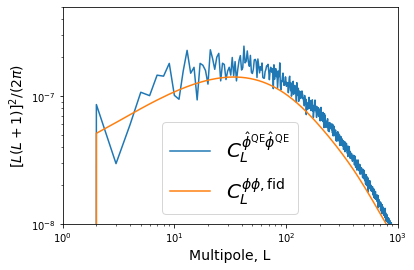

In [3]:
plm_QE = ana_mwe.get_plm(0)
# plm_MAP = ana_mwe.get_plm_it(ana_mwe.itmax)
ll = np.arange(0,4001,1)
scale_factor = (ll*(ll+1))**2/(2*np.pi)
plt.plot(scale_factor*hp.alm2cl(plm_QE), label=r'$C_L^{\hat{\phi}^{\rm QE}\hat{\phi}^{\rm QE}}$')
plt.plot(scale_factor*ana_mwe.cpp, label=r'$C_L^{\phi\phi,{\rm fid}}$')
# plt.plot(hp.alm2cl(plm_MAP)*np.arange(0,4001,1)**4/(2*np.pi), label=r'$C_L^{\phi^{\rm MAP}\phi^{\rm MAP}}$')

plt.legend(fontsize=20)
plt.xlabel('Multipole, L', fontsize=14)
plt.ylabel(r'$\left[L(L+1)\right]^2/(2\pi)$', fontsize=14)
plt.xscale('log')
plt.xlim(1,1e3)
plt.ylim(1e-8,5e-7)
plt.yscale('log')